# Hashtable implementations of sets and dictionaries

## Search set of integers

In [1]:
from lolviz import *

In [2]:
import numpy as np
n = 5_000_000
A = list(np.random.randint(low=0,high=1_000_000,size=n))
A[0:10]

[509385, 571020, 998421, 173251, 567339, 229005, 614066, 89806, 878866, 496601]

In [3]:
def lsearch(A,x):
    for a in A:
        if a==x:
            return True
    return False

In [4]:
%time lsearch(A, 999)

CPU times: user 190 ms, sys: 5.95 ms, total: 196 ms
Wall time: 209 ms


True

In [5]:
%time for a in range(50): lsearch(A, a)

CPU times: user 6.97 s, sys: 93.9 ms, total: 7.06 s
Wall time: 7.38 s


the goal is to reduce the search space... let's say we want to cut the search space on average by 10.  The idea is to use something about the value itself to tell us something about the location. use the example of Eric Erickson.  A function that tells us something about the location of a value is called a hash function.   We can think about it as giving us the postal code of a person in the United States.  It means we have to organize the search space in the regions and then the hash function gives us the region based upon the value we are searching for.

here's one possible hash function. Use remainder / modulo operator to convert all numbers into a value between [0,9]

In [23]:
def hash(x):
    return x % 10

[(a,hash(a)) for a in A[0:10]]

[(509385, 5),
 (571020, 0),
 (998421, 1),
 (173251, 1),
 (567339, 9),
 (229005, 5),
 (614066, 6),
 (89806, 6),
 (878866, 6),
 (496601, 1)]

 but now we need a different data structure than just a list of integers.. we have to organize things. let's make buckets and put all of the integers with the same hash into the same pocket.

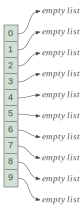

In [7]:
buckets = [[] for i in range(10)] # make sure each bucket is a separate list
objviz(buckets)

In [8]:
for a in A[0:10]:
    buckets[hash(a)].append(a)
buckets

[[571020],
 [998421, 173251, 496601],
 [],
 [],
 [],
 [509385, 229005],
 [614066, 89806, 878866],
 [],
 [],
 [567339]]

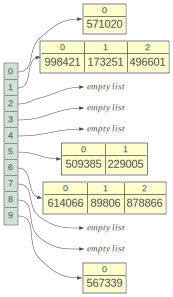

In [9]:
objviz(buckets)

In [27]:
def hash(x):
    return x % 10

def htable(A):
    "Build hashtable for integer values"
    buckets = [[] for i in range(10)]
    for a in A:
        buckets[hash(a)].append(a)
    return buckets

In [28]:
def hsearch(buckets,x):
    i = hash(x)
    for a in buckets[i]:
        if a==x:
            return True
    return False

In [29]:
buckets = htable(A)
%time hsearch(buckets, 999)

CPU times: user 17.8 ms, sys: 542 µs, total: 18.4 ms
Wall time: 18.8 ms


True

In [30]:
%time for a in range(50): hsearch(buckets, a)

CPU times: user 837 ms, sys: 18 ms, total: 855 ms
Wall time: 875 ms


### Set of strings

In [15]:
# get list of United States cities from Wikipedia
import pandas as pd
tables = pd.read_html("https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population")
cities = list(tables[4]['City'])
cities = np.array([c.lower() for c in cities])
list(cities[np.random.randint(0,len(cities),size=20)])

['salinas',
 'midland',
 'lakewood',
 'st. louis[m]',
 'chula vista',
 'long beach',
 'rockford',
 'oxnard',
 'gresham',
 'league city',
 'philadelphia[e]',
 'edinburg',
 'sandy springs',
 'akron',
 'roseville',
 'chicago',
 'green bay',
 'ontario',
 'orlando',
 'boston']

In [136]:
cities = ['elgin', 'tyler', 'austin', 'hillsboro', 'greeley',
          'davie', 'rockford', 'orange', 'sandy springs', 'garden grove',
          'paterson', 'clarksville', 'fairfield', 'victorville', 'fresno',
          'palmdale', 'frisco', 'corona', 'austin', 'cape coral']

In [137]:
def hash(s):
    # convert first char to int in [0,25]
    return ord(s[0]) - ord('a')

[(c,hash(c)) for c in cities[0:10]]

[('elgin', 4),
 ('tyler', 19),
 ('austin', 0),
 ('hillsboro', 7),
 ('greeley', 6),
 ('davie', 3),
 ('rockford', 17),
 ('orange', 14),
 ('sandy springs', 18),
 ('garden grove', 6)]

In [138]:
def htable(A):
    buckets = [[] for i in range(26)]
    for a in A:
        buckets[hash(a)].append(a)
    return buckets

In [139]:
def hsearch(buckets,x):
    i = hash(x)
    for a in buckets[i]:
        if a==x:
            return True
    return False

In [140]:
buckets = htable(cities)
%time hsearch(buckets, "austin")

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.91 µs


True

In [141]:
%time hsearch(buckets, "denver")

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 6.91 µs


False

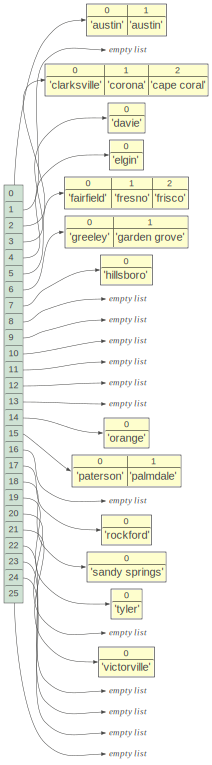

In [142]:
objviz(buckets)

Redefine so that we have 10 buckets again

In [143]:
def hash(s):
    return ord(s[0])

def htable(A):
    buckets = [[] for i in range(10)]
    for a in A:
        # fit in 10 buckets
        b = hash(a) % 10
        buckets[b].append(a)
    return buckets

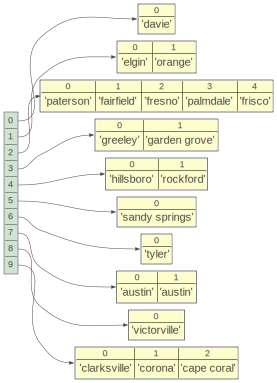

In [144]:
buckets = htable(cities)
objviz(buckets)

## Dictionaries

### List of tuples

In [78]:
pop = [
    ('Roanoke', 100011),
    ('Nampa', 100200),
    ('Edinburg', 100243),
    ('Clinton', 100513),
    ('Houston', 2304580)
]

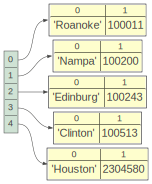

In [106]:
lolviz(pop)

In [82]:
def llookup(A,x):
    for k,v in A:
        if k==x:
            return v
    return None

In [83]:
llookup(pop, 'Clinton')

100513

In [84]:
llookup(pop, 'SF')

### Hashtable

In [145]:
def hash(s):
    return ord(s[0])

def htable_dict(A,nbuckets):
    buckets = [[] for i in range(nbuckets)]
    for k,v in A:
        b = hash(k) % nbuckets
        buckets[b].append((k,v))
    return buckets

In [146]:
buckets = htable_dict(pop, 5)

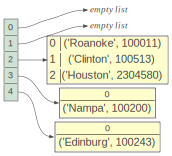

In [147]:
lolviz(buckets)

In [95]:
def hlookup(buckets,x,nbuckets):
    i = hash(x) % nbuckets
    for k,v in buckets[i]:
        if k==x:
            return v
    return None

In [100]:
buckets = htable_dict(pop, 3)

In [100]:
hlookup(buckets, 'Clinton', nbuckets=3)

100513

In [101]:
hlookup(buckets, 'SF', nbuckets=3)

### degenerate case

In [111]:
buckets = htable_dict(pop, 1)

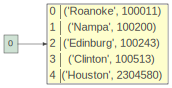

In [112]:
lolviz(buckets)

### Mapping keys to sets

In [115]:
words = [('the', {3,1,5}), ('cat',{9}), ('sat',{4,9})]

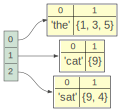

In [116]:
lolviz(words)

In [118]:
the = llookup(words, 'the')
the

{1, 3, 5}

In [119]:
the.add(1000)

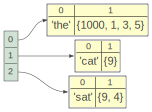

In [120]:
lolviz(words)

In [121]:
llookup(words, 'the')

{1, 3, 5, 1000}

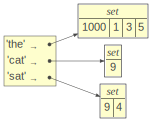

In [126]:
# what doesn't look like as a map from word to set?
objviz(dict(words))

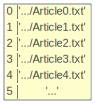

In [129]:
lolviz([f".../Article{f}.txt" for f in range(5)]+['...'])